In [1]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg = VGG19(include_top=False, weights='imagenet')
for layer in vgg.layers:
    print(f'{layer.name} --> {layer.output_shape}')

input_1 --> [(None, None, None, 3)]
block1_conv1 --> (None, None, None, 64)
block1_conv2 --> (None, None, None, 64)
block1_pool --> (None, None, None, 64)
block2_conv1 --> (None, None, None, 128)
block2_conv2 --> (None, None, None, 128)
block2_pool --> (None, None, None, 128)
block3_conv1 --> (None, None, None, 256)
block3_conv2 --> (None, None, None, 256)
block3_conv3 --> (None, None, None, 256)
block3_conv4 --> (None, None, None, 256)
block3_pool --> (None, None, None, 256)
block4_conv1 --> (None, None, None, 512)
block4_conv2 --> (None, None, None, 512)
block4_conv3 --> (None, None, None, 512)
block4_conv4 --> (None, None, None, 512)
block4_pool --> (None, None, None, 512)
block5_conv1 --> (None, None, None, 512)
block5_conv2 --> (None, None, None, 512)
block5_conv3 --> (None, None, None, 512)
block5_conv4 --> (None, None, None, 512)
block5_pool --> (None, None, None, 512)


#### Gram matrix
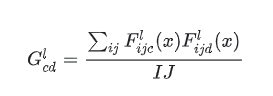

In [2]:
content_img = 'resource/penguin.jpeg'
style_img = 'resource/style1.jpg'

#### Plot the original content image and style image

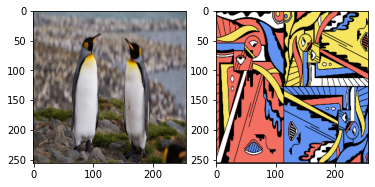

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
%matplotlib inline

content_img = cv2.resize(cv2.imread(content_img), (256, 256)) # load the image and resize to 256 x 256
content_img = tf.image.convert_image_dtype(content_img, tf.float32) # normalize the image pixel between 0 and 1
style_img = cv2.resize(cv2.imread(style_img), (256, 256))
style_img = tf.image.convert_image_dtype(style_img, tf.float32)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(np.array(content_img), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(style_img), cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

#### Calculating the loss object
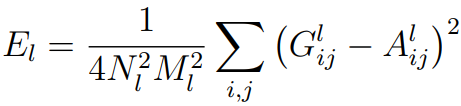
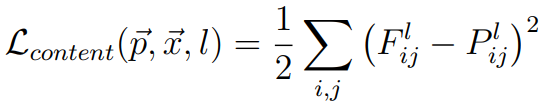

In [ ]:
from utils.utils import load_pre_trained_model

local_weights = 'resource/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = load_pre_trained_model(local_weights)
content_target = model(np.array([content_img * 255]))[0]
style_target = model(np.array([style_img * 255]))[1]

#### Train the model

In [ ]:
import time
from utils.utils import train_step

epochs = 1000
img = tf.image.convert_image_dtype(content_img, tf.float32) # convert image value to range 0 and 1
img = tf.Variable([img]) # convert the constant image pixel to tf variable for backprop to happen
start = time.time()
for i in range(epochs):
    train_step(img, i, style_target, content_target, optimizer, model, start)
end = time.time()
print(f'Time taken for {epochs} epochs = {round(end - start, 2)} s')

In [ ]:
import PIL

tensor = img * 255
tensor = np.array(tensor, dtype=np.uint8)
if np.ndim(tensor) > 3:
  assert tensor.shape[0] == 1
  tensor = tensor[0]
tensor =  PIL.Image.fromarray(tensor)
plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
plt.show()